In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df1 = pd.read_csv('E:/upgrad/ML module/Linear Regression Assignment/day.csv')

In [3]:
df1

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


# Understanding the data & EDA

In [4]:
df1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## No null values, data types are also correct, no obvious outliers based on min, max, 50%, 75%, 25% values

In [6]:
df1.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
categorical_list =['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit']

In [8]:
continuos_list = list(set(df1.columns).difference(set(categorical_list)))

In [9]:
continuos_list

['hum',
 'windspeed',
 'temp',
 'casual',
 'dteday',
 'atemp',
 'instant',
 'cnt',
 'registered']

## Categorical Variables & Continuos variables need to be analysed by different graphs. Hence we made seperate lists of them

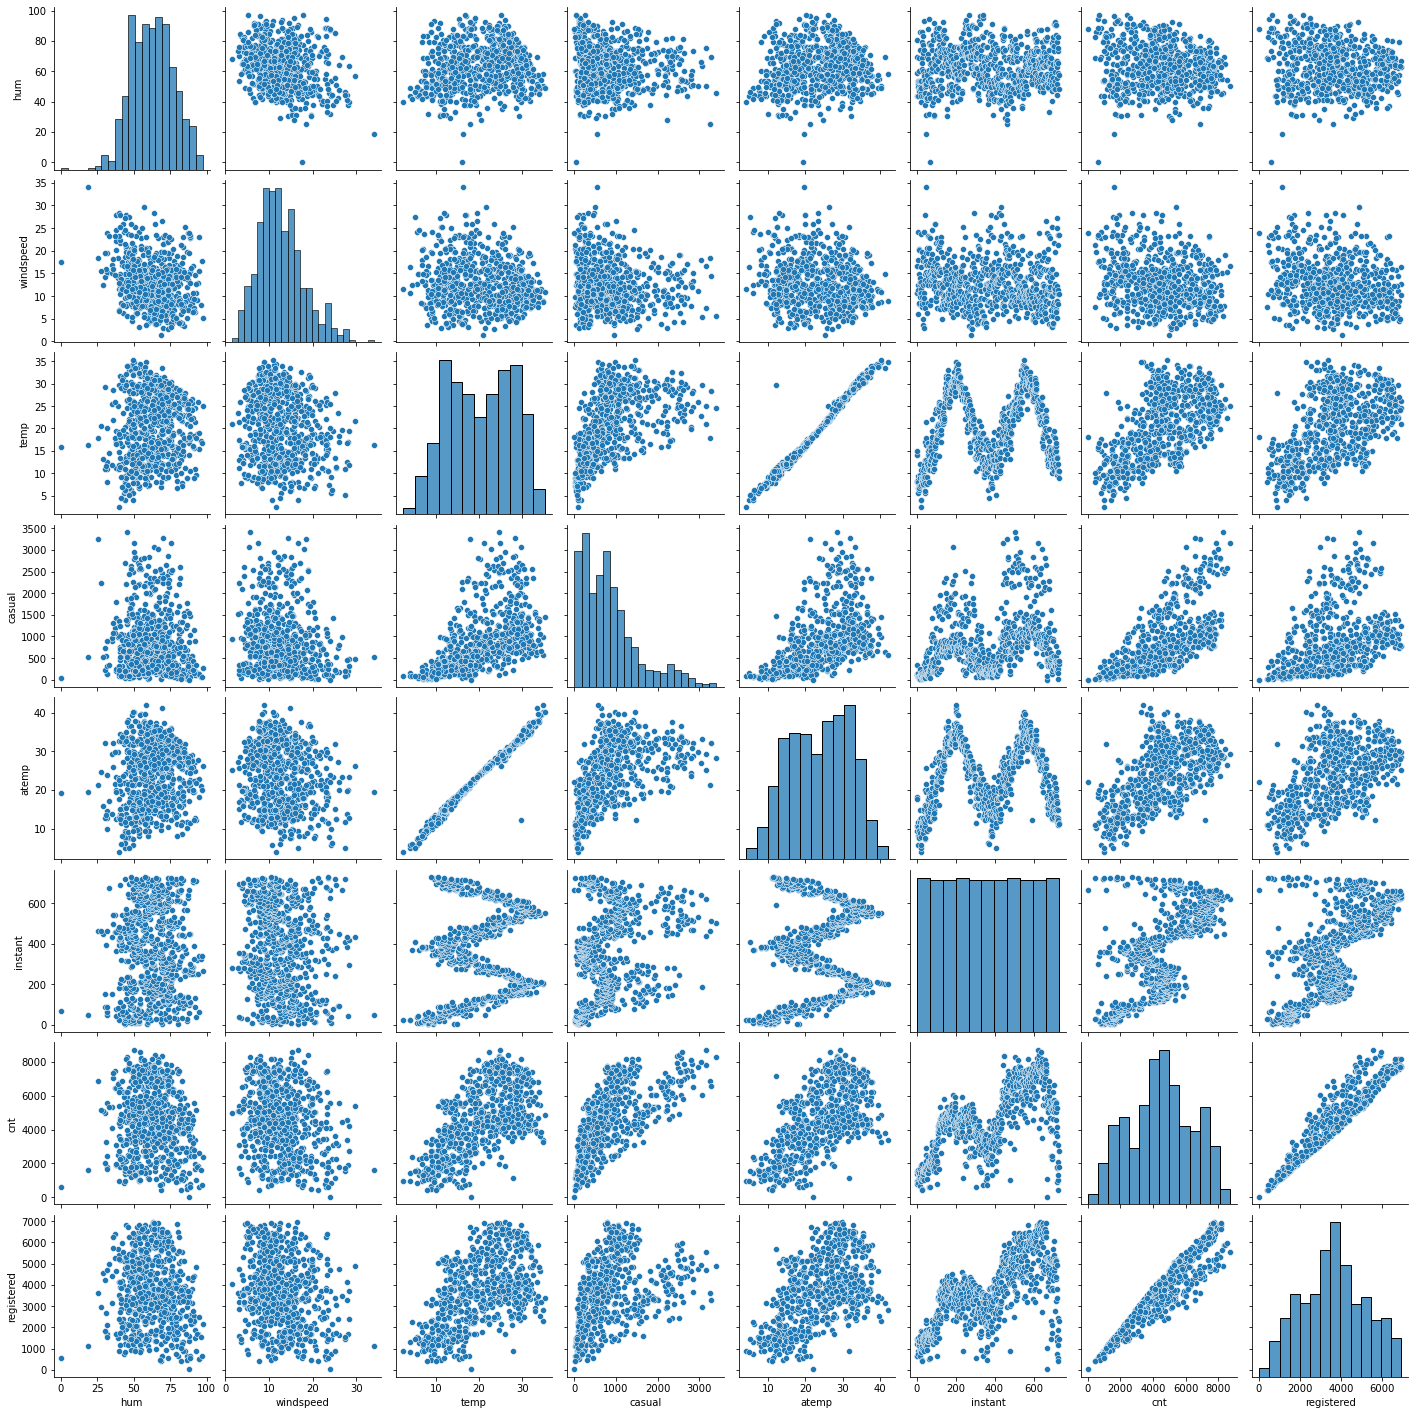

In [10]:
sns.pairplot(df1[continuos_list])

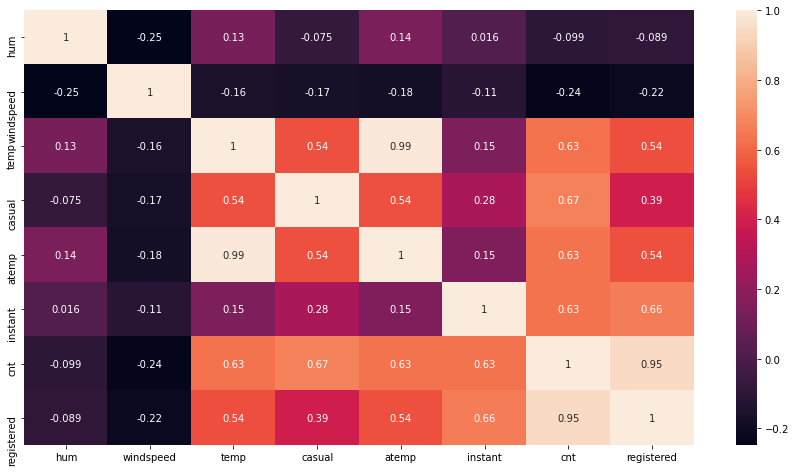

In [11]:
plt.figure(figsize = (15,8))
sns.heatmap(df1[continuos_list].corr(),annot = True)
plt.show()

## Based on above graphs & heatmap, we can understand count is strongly correlated with registered users, casual users, temp/atemp. However count = registered users + casual users. Hence it is on expected lines

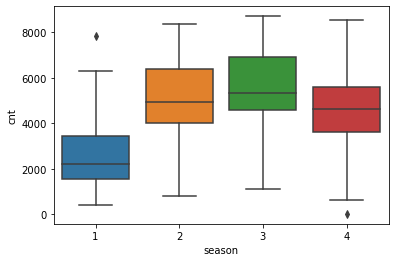

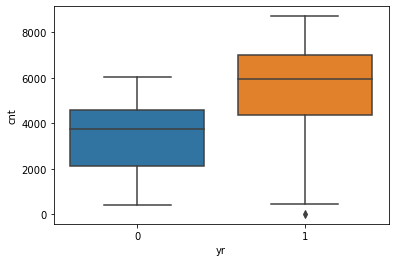

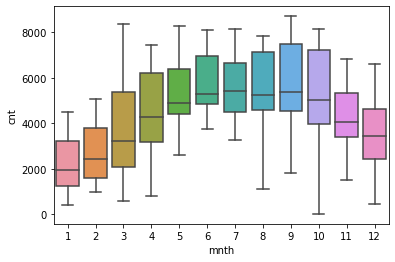

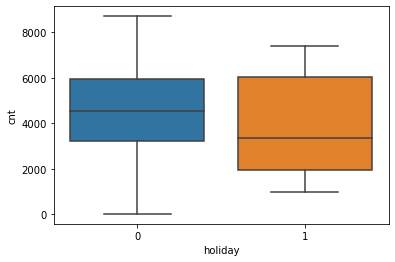

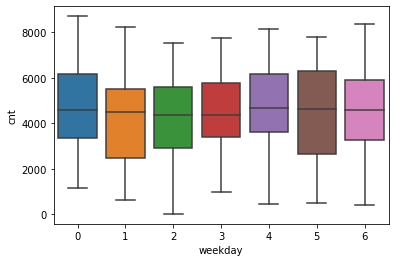

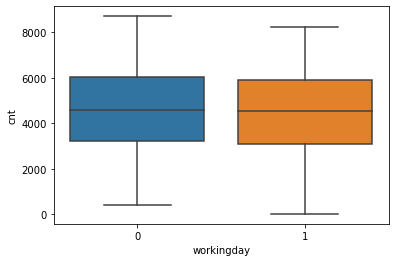

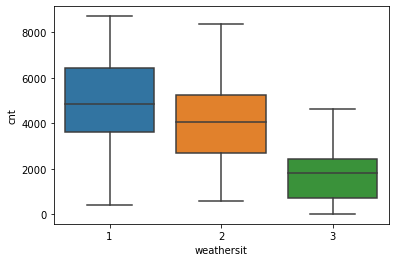

In [12]:
for i in categorical_list:
    sns.boxplot(x=df1[i], y = df1.cnt)
    plt.show()

## Based on the above graphs, it is clear that 
## cnt is high in season 4, 
## cnt is highers in months - 5,6,7,8,9 
## cnt is significantly higher in weathersit1 
## cnt is higher in year 2 compared to year 1 
## cnt is lower during holidays

In [13]:
# Plotting the target variable against the days & seeing the patterns

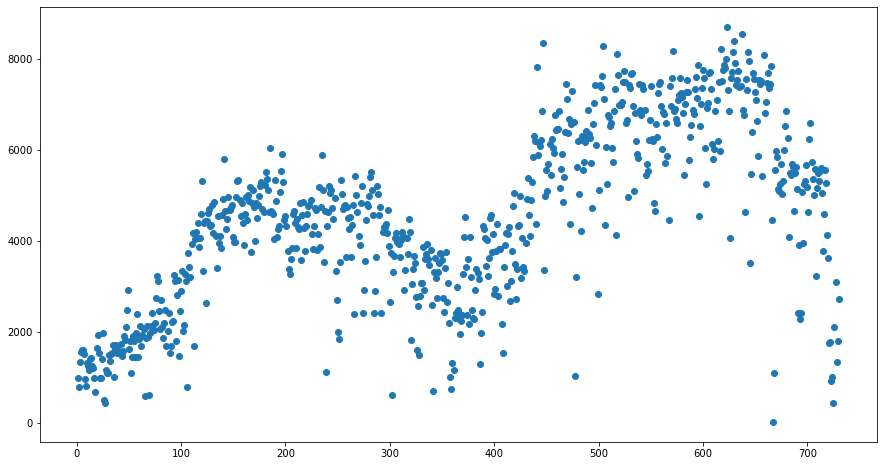

In [14]:
plt.figure(figsize = (15,8))
plt.scatter(y= df1.cnt, x = df1.instant)

### Linear Regression process start - 
## Data Preparation

In [15]:
## Converting 'weathersit' and 'season' to categorical variables as it doesnt make sense to analyse them in terms
## of numbers

In [16]:
df1['season'].replace({2:'summer', 3:'fall',1: 'spring', 4: 'winter'},inplace = True)

In [17]:
df1.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [18]:
df1['weathersit'].replace({1:'Clear', 2:'Mist ', 3: 'Light Snow', 4: 'Heavy Rain'},inplace = True)

In [19]:
df1.weathersit.value_counts()

Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

In [20]:
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [21]:
df1['mnth'].replace({1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July', 8:'Aug',9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'},inplace = True)

In [22]:
df1

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,spring,1,Dec,0,5,1,Mist,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,Dec,0,6,0,Mist,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,Dec,0,0,0,Mist,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,Dec,0,1,1,Clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [23]:
# Creating Dummy Variables

In [24]:
season = pd.get_dummies(df1['season'], drop_first = True)

In [25]:
month = pd.get_dummies(df1['mnth'], drop_first = True)

In [26]:
weather = pd.get_dummies(df1['weathersit'], drop_first = True)

In [27]:
df2 = pd.concat([df1,weather,month,season], axis = 1 )

In [28]:
df2.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'Light Snow', 'Mist ', 'Aug', 'Dec',
       'Feb', 'Jan', 'July', 'June', 'March', 'May', 'Nov', 'Oct', 'Sept',
       'spring', 'summer', 'winter'],
      dtype='object')

In [29]:
# We can drop Date-day column as dates cant be used directly in a linear regression model & instant is very good proxy 
# for date.

In [30]:
df2 = df2.drop(columns =['dteday'])

In [31]:
df2.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,July,June,March,May,Nov,Oct,Sept,spring,summer,winter
0,1,spring,0,Jan,0,1,1,Mist,14.110847,18.18125,...,0,0,0,0,0,0,0,1,0,0
1,2,spring,0,Jan,0,2,1,Mist,14.902598,17.68695,...,0,0,0,0,0,0,0,1,0,0
2,3,spring,0,Jan,0,3,1,Clear,8.050924,9.47025,...,0,0,0,0,0,0,0,1,0,0
3,4,spring,0,Jan,0,4,1,Clear,8.200000,10.60610,...,0,0,0,0,0,0,0,1,0,0
4,5,spring,0,Jan,0,5,1,Clear,9.305237,11.46350,...,0,0,0,0,0,0,0,1,0,0


In [32]:
# Also dropping season, mnth, weathersit columns as dummy variables have been created.

In [33]:
df2 = df2.drop(columns =['mnth','weathersit','season'])

In [34]:
df2.head()

,instant,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,...,July,June,March,May,Nov,Oct,Sept,spring,summer,winter
0,1,0,0,1,1,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,0,0,0,1,0,0
1,2,0,0,2,1,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,1,0,0
2,3,0,0,3,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,4,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,1,0,0
4,5,0,0,5,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,1,0,0


In [35]:
# As mentioned earlier, cnt will be our target variable & registered+casual = cnt. Hence , inorder to develop a model
#which understands the impact of various factors, we need to drop these 2 variables.

In [36]:
df2.columns

Index(['instant', 'yr', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'Light Snow',
       'Mist ', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'March', 'May',
       'Nov', 'Oct', 'Sept', 'spring', 'summer', 'winter'],
      dtype='object')

In [37]:
df3 = df2.drop(columns =['casual','registered'])

In [38]:
df3.head()

,instant,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,...,July,June,March,May,Nov,Oct,Sept,spring,summer,winter
0,1,0,0,1,1,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,1,0,0
1,2,0,0,2,1,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,1,0,0
2,3,0,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,1,0,0
4,5,0,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,1,0,0


## Test-Train Split

In [39]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df3, train_size = 0.7, random_state = 100)

## Scaling

In [40]:
continuos_list

['hum',
 'windspeed',
 'temp',
 'casual',
 'dteday',
 'atemp',
 'instant',
 'cnt',
 'registered']

In [41]:
continuos_list = [e for e in continuos_list if e not in ('casual', 'registered','dteday')]

In [42]:
continuos_list

['hum', 'windspeed', 'temp', 'atemp', 'instant', 'cnt']

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
var = continuos_list
df_train[var] = scaler.fit_transform(df_train[var])

<ipython-input-43-b0877b79f010>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[var] = scaler.fit_transform(df_train[var])
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [44]:
df_train.describe()

,instant,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,...,July,June,March,May,Nov,Oct,Sept,spring,summer,winter
count,5.100000e+02,510.000000,510.000000,510.000000,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,-4.941581e-17,0.507843,0.025490,2.950980,0.711765,-2.746169e-16,-2.972568e-16,-2.166023e-16,9.523972e-18,1.493359e-16,...,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.243137,0.247059,0.247059
std,1.000982e+00,0.500429,0.157763,1.977166,0.453386,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,...,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.429398,0.431725,0.431725
min,-1.755955e+00,0.000000,0.000000,0.000000,0.000000,-2.381884e+00,-2.418253e+00,-4.464419e+00,-1.891589e+00,-2.290356e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.664688e-01,0.000000,0.000000,1.000000,0.000000,-8.756866e-01,-8.532972e-01,-7.675694e-01,-7.174407e-01,-7.006211e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.062943e-02,1.000000,0.000000,3.000000,1.000000,2.285273e-02,7.804793e-02,2.219277e-02,-1.421889e-01,2.291863e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.790730e-01,1.000000,0.000000,5.000000,1.000000,8.765214e-01,8.261031e-01,7.161828e-01,5.515521e-01,7.636488e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.720801e+00,1.000000,1.000000,6.000000,1.000000,2.050027e+00,2.294254e+00,2.398847e+00,4.003357e+00,2.169933e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
y_train = df_train.pop('cnt')
X_train = df_train

In [46]:
y_train

576    1.401236
426   -0.215182
728   -1.380030
482   -0.136157
111   -1.438016
         ...   
578    1.424328
53    -1.317939
350   -0.896131
79    -1.235835
520    1.290909
Name: cnt, Length: 510, dtype: float64

In [47]:
X_train.columns

Index(['instant', 'yr', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'Light Snow', 'Mist ', 'Aug', 'Dec', 'Feb', 'Jan',
       'July', 'June', 'March', 'May', 'Nov', 'Oct', 'Sept', 'spring',
       'summer', 'winter'],
      dtype='object')

In [48]:
X_train

,instant,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,Light Snow,...,July,June,March,May,Nov,Oct,Sept,spring,summer,winter
576,0.994885,1,0,3,1,1.230870,1.193181,0.515796,-0.331282,0,...,1,0,0,0,0,0,0,0,0,0
426,0.278521,1,0,0,0,-0.421238,-0.349583,-0.070634,-0.386359,0,...,0,0,1,0,0,0,0,1,0,0
728,1.720801,1,0,1,1,-1.295618,-1.474112,-1.046051,2.017388,0,...,0,0,0,0,0,0,0,1,0,0
482,0.545963,1,0,0,0,-0.628327,-0.572197,-1.001847,-0.780539,0,...,0,0,0,0,0,0,0,0,1,0
111,-1.225845,0,0,0,0,-0.849222,-0.915819,0.695551,0.354275,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.004437,1,0,5,1,1.447165,1.466544,0.200476,-0.788409,0,...,0,0,0,0,0,0,0,0,0,0
53,-1.502839,0,0,5,1,-1.483898,-1.387406,-1.472451,-1.235018,0,...,0,0,0,0,0,0,0,1,0,0
350,-0.084437,0,0,1,1,-1.281812,-1.364803,-0.497932,0.653940,0,...,0,0,0,0,0,0,0,0,0,1
79,-1.378669,0,0,3,1,-0.331400,-0.372823,0.750773,1.232031,0,...,0,0,1,0,0,0,0,0,1,0


# Modelling

In [49]:
# RFE

In [50]:
X_train.shape

(510, 25)

In [51]:
from sklearn.feature_selection import RFE

lm = LinearRegression()
rfe = RFE(lm, 15)
rfe.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [52]:
col = X_train.columns[rfe.support_]
col

Index(['instant', 'yr', 'holiday', 'temp', 'Light Snow', 'Mist ', 'Aug', 'Feb',
       'Jan', 'July', 'Oct', 'Sept', 'spring', 'summer', 'winter'],
      dtype='object')

In [53]:
X_train_rfe = X_train[col]

In [54]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     157.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.85e-177
Time:                        20:32:02   Log-Likelihood:                -276.51
No. Observations:                 510   AIC:                             585.0
Df Residuals:                     494   BIC:                             652.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5676      0.117     -4.871      0.0

In [55]:
# Model 2 - Dropping Aug as p value is high
X_train_rfe.drop(columns = 'Aug', inplace = True)

In [56]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     168.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          7.03e-178
Time:                        20:32:03   Log-Likelihood:                -277.18
No. Observations:                 510   AIC:                             584.4
Df Residuals:                     495   BIC:                             647.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4815      0.089     -5.412      0.0

In [57]:
# Model 3 - Dropping summer as p value is high
X_train_rfe.drop(columns = 'summer', inplace = True)

In [58]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          7.23e-179
Time:                        20:32:03   Log-Likelihood:                -277.54
No. Observations:                 510   AIC:                             583.1
Df Residuals:                     496   BIC:                             642.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4709      0.088     -5.350      0.0

In [59]:
# Model 4 - Dropping oct as p value is high
X_train_rfe.drop(columns = 'Oct', inplace = True)

In [60]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     196.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.19e-179
Time:                        20:32:03   Log-Likelihood:                -278.42
No. Observations:                 510   AIC:                             582.8
Df Residuals:                     497   BIC:                             637.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4907      0.087     -5.654      0.0

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,21.46
1,instant,15.66
2,yr,12.57
12,winter,3.48
11,spring,3.37
4,temp,3.09
8,Jan,2.42
7,Feb,1.90
9,July,1.30
10,Sept,1.19


In [62]:
# Model 5 - Dropping the const as VIF is greater than 5
X_train_rfe.drop(columns = 'const', inplace = True)

In [63]:
import statsmodels.api as sm
#X_train_rfe = sm.add_constant(X_train_rfe)

lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.810
Method:                 Least Squares   F-statistic:                              182.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):                   2.57e-173
Time:                        20:32:03   Log-Likelihood:                         -294.32
No. Observations:                 510   AIC:                                      612.6
Df Residuals:                     498   BIC:                                      663.4
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [64]:
# Model 6 - Dropping the Jan as p value is high
X_train_rfe.drop(columns = 'Jan', inplace = True)

In [65]:
import statsmodels.api as sm


lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.810
Method:                 Least Squares   F-statistic:                              198.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):                   2.59e-174
Time:                        20:32:04   Log-Likelihood:                         -294.70
No. Observations:                 510   AIC:                                      611.4
Df Residuals:                     499   BIC:                                      658.0
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [66]:
# Model 7 - Dropping the winter as p value is high
X_train_rfe.drop(columns = 'winter', inplace = True)

In [67]:
import statsmodels.api as sm


lm1 = sm.OLS(y_train, X_train_rfe).fit()
print(lm1.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.810
Method:                 Least Squares   F-statistic:                              218.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):                   1.74e-175
Time:                        20:32:04   Log-Likelihood:                         -294.72
No. Observations:                 510   AIC:                                      609.4
Df Residuals:                     500   BIC:                                      651.8
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,yr,4.43
0,instant,3.43
9,spring,3.37
3,temp,2.09
5,Mist,1.46
6,Feb,1.39
7,July,1.34
8,Sept,1.15
2,holiday,1.03
4,Light Snow,1.03


Since VIF is less than 5, there is no multicollinearity

# Testing

In [69]:
df_test[var] = scaler.transform(df_test[var])

<ipython-input-69-932dc292469c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[var] = scaler.transform(df_test[var])
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [70]:
y_test = df_test.pop('cnt')
X_test = df_test

In [71]:
retain = list(X_train_rfe.columns)

In [72]:
X_test_rfe = X_test[retain]

In [73]:
X_test_rfe

,instant,yr,holiday,temp,Light Snow,Mist,Feb,July,Sept,spring
184,-0.877214,0,1,1.304506,0,1,0,1,0,0
535,0.799079,1,0,1.612837,0,0,0,0,0,0
299,-0.328001,0,0,-0.112907,0,1,0,0,0,0
221,-0.700511,0,0,1.525401,0,0,0,0,0,0
152,-1.030039,0,0,1.240076,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
702,1.596632,1,0,-0.080695,0,0,0,0,0,0
127,-1.149433,0,0,0.209230,0,0,0,0,0,0
640,1.300534,1,0,0.922539,0,1,0,0,0,0
72,-1.412100,0,0,-0.912453,0,0,0,0,0,1


In [74]:
#X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe.columns

Index(['instant', 'yr', 'holiday', 'temp', 'Light Snow', 'Mist ', 'Feb',
       'July', 'Sept', 'spring'],
      dtype='object')

In [75]:
y_pred = lm1.predict(X_test_rfe)

In [76]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7939582005370586

R2 value on the test data is 79.3% which means our model is working well as adjusted R2 on train data was 81.1% & no major change
was observed 

Text(0, 0.5, 'y_pred')

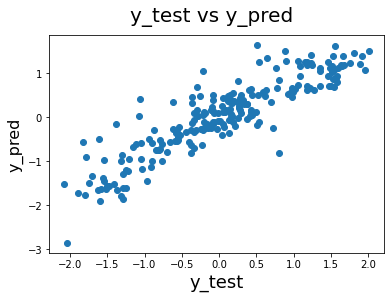

In [77]:

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

In [78]:
y_train_pred = lm1.predict(X_train_rfe)

# Residual Analysis

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

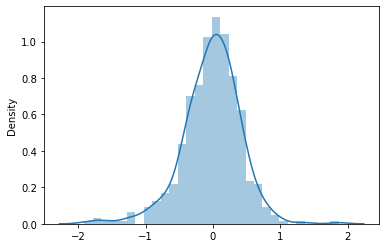

In [79]:
sns.distplot((y_train-y_train_pred))

Errors are normally distributed with 0 as mean.

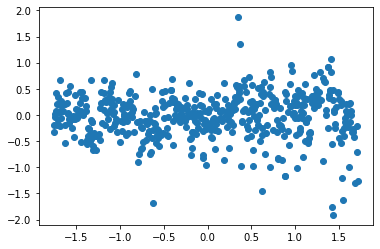

In [80]:
plt.scatter(X_train['instant'],(y_train-y_train_pred))

 Clearly error terms are independent of each other as there is no particular pattern in above graph.
 
 Also, variance in the errors is almost same across the data

## Business Recommendations:

###  Inferences: Features impacting the bike demand

1)  Clear, Few clouds, Partly cloudy, Partly cloudy days are best for bikes demand.  Mist is bad & Light snow is worse & 
    Heavy snow means zero bikes demand.
    
2)  Year 2 has much higher demand than year 1. Looks like there is positive trend in terms of business growth(however 2 years
    is too small for commenting on trend)
    
3)  Spring season is very bad compared to fall season for bikes demand

4)  Higher Temperature is btr for good bikes demand

5)  Features like holidays impact demand negatively
